In [1]:
# import packages
import csv
# import pandas
import numpy as np
import random
import scipy.io as sio
import matplotlib.pyplot as plt

In [2]:
data = sio.loadmat('hw2data_2.mat')

In [3]:
print(type(data['Y']))
print(data['X'])

<type 'numpy.ndarray'>
[[-18.17292628]
 [-27.05278863]
 [ 10.00336632]
 ...
 [-14.96480916]
 [ -5.49892149]
 [ 13.55762568]]


/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


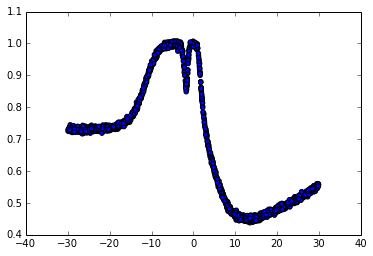

In [4]:
x = np.linspace(0, 3, 100)
%matplotlib inline  
plt.scatter(data['X'],data['Y'])

In [21]:
def Activefun(x):
    return(1/(1+np.exp(-x)))

'''
w1: array k*1
w2: array 1*k
b1: double k*1
b2: array 1
x: array n*1
y: array n*1
'''
    
def Deriv_W2(w1,w2,b1,b2,x,y):
    Deriv = 0
    for i in range(len(x)):
        # compute 1st layer
        res1 = Activefun(w1*x[i]+b1)  # k*1
        
        # compute variable passing to active function at 2nd layer
        var_act = np.dot(w2,res1)+b2 # w^T*x+b
        dev = res1*Activefun(var_act-y[i])*Activefun(var_act)* \
        (1-Activefun(var_act))
        Deriv += dev
    return Deriv / len(x)

def Deriv_W1(w1,w2,b1,b2,x,y):
    Deriv = 0
    for i in range(len(x)):
        # compute 1st layer
        res1 = Activefun(w1*x[i]+b1)  # k*1
        
        # compute variable passing to active function at 2nd layer
        var_act = np.dot(w2,res1)+b2 # w^T*x+b
        
        # compute deriv for 1st layer
        dev1 = 2*x[i]*Activefun(res1-y[i])*Activefun(res1)* \
        (1-Activefun(res1))
        
        dev =np.dot(res1,w2)*Activefun(var_act-y[i])*Activefun(var_act)* \
        (1-Activefun(var_act)) * np.square(dev1)
        Deriv += dev
    return Deriv / len(x)

def Deriv_b2(w1,w2,b1,b2,x,y):
    Deriv = 0
    for i in range(len(x)):
        # compute 1st layer
        res1 = Activefun(w1*x[i]+b1)  # k*1
        
        # compute variable passing to active function at 2nd layer
        var_act = np.dot(w2,res1)+b2 # w^T*x+b
        
        dev = Activefun(var_act-y[i])*Activefun(var_act)* \
        (1-Activefun(var_act))
        
        Deriv += dev
    return Deriv / len(x)

def Deriv_b1(w1,w2,b1,b2,x,y):
    Deriv = 0
    for i in range(len(x)):
        # compute 1st layer
        res1 = Activefun(w1*x[i]+b1)  # k*1
        
        # compute variable passing to active function at 2nd layer
        var_act = np.dot(w2,res1)+b2 # w^T*x+b
        
        # compute deriv for 1st layer
        dev1 = Activefun(res1)*(1-Activefun(res1))
        
        dev = Activefun(var_act-y[i])*w2*Activefun(var_act)* \
        (1-Activefun(var_act))* dev1
        Deriv += dev
    return Deriv / len(x)

def predict(w1,w2,b1,b2,x):
    
    y = []
    for i in range(len(x)):
        # compute 1st layer
        res1 = Activefun(w1*x[i]+b1)  # k*1
        
        # compute variable passing to active function at 2nd layer
        res2 = Activefun(np.dot(w2,res1)+b2)
        y.append(res2)
        
    return (np.array(y))

def avererror(w1,w2,b1,b2,x,y):
    error = 0
    for i in range(len(x)):
        # compute 1st layer
        res1 = Activefun(w1*x[i]+b1)  # k*1
        
        # compute variable passing to active function at 2nd layer
        res2 = Activefun(np.dot(w2,res1)+b2)

        error += np.square(res2 - y[i])
        
    return error / (2 * len(x))

In [22]:
w1=np.array([1,2,3])
w2=np.array([1,2,3])
b1=np.array([1,2,3])
b2=1
print(Deriv_W2(w1,w2,b1,b2,data['X'],data['Y']))
print(Deriv_W1(w1,w2,b1,b2,data['X'],data['Y']))
print(Deriv_b2(w1,w2,b1,b2,data['X'],data['Y']))
print(Deriv_b1(w1,w2,b1,b2,data['X'],data['Y']))
print(avererror(w1,w2,b1,b2,data['X'],data['Y']))
print(predict(w1,w2,b1,b2,data['X']))

[0.00151336 0.00090364 0.00073396]
[0.04859883 0.04856657 0.04855366]
[0.04941992]
[0.01231475 0.0246458  0.03697429]
[0.06303772]
[0.73105859 0.73105858 0.99908893 ... 0.73105875 0.73326473 0.99908895]


In [92]:
def train(x,y,k=10):
    '''
    x: array n*1
    y: array n*1
    '''
    # initial W and B
    w1 = np.random.rand(k)
    w2 = np.random.rand(k)
    b1 = np.random.rand(k)
    b2 = np.random.rand(1)
    
    # set step
    eta = 10
    
    diff = 1
    
    while(avererror(w1,w2,b1,b2,x,y)>0.01):
        # compute gradients
#         grad_w1 = Deriv_W1(w1,w2,b1,b2,x,y)
#         grad_w2 = Deriv_W2(w1,w2,b1,b2,x,y)
#         grad_b1 = Deriv_b1(w1,w2,b1,b2,x,y)
#         grad_b2 = Deriv_b2(w1,w2,b1,b2,x,y)
        
        (grad_w2,grad_b2,grad_w1,grad_b1) = \
        er_dev(x,y,w1,w2,b1,b2)
        
        # update weight parameters
        w1 = w1 - eta*grad_w1
        w2 = w2 - eta*grad_w2
        b1 = b1 - eta*grad_b1
        b2 = b2 - eta*grad_b2
        
        #compute maximum gradient
#         diffw1 = max(grad_w1)
#         diffw2 = max(grad_w2)
#         diffb1 = max(grad_b1)
#         diffb2 = max(grad_b2)
#         diff = max(diffw1,diffw2,diffb1,diffb2)
        
    return(w1,w2,b1,b2)

def test(x,y,w1,w2,b1,b2):
    '''
    x: array n*1
    y: array n*1
    '''
    
    err = avererror(w1,w2,b1,b2,x,y)
    
    return(err)

In [93]:
trainind = random.sample(range(2000),1500)
testind = list(set(range(2000)) - set(trainind))
tr_da = data['X'][trainind]
tr_lab = data['Y'][trainind]
te_da = data['X'][testind]
te_lab = data['Y'][testind]

In [94]:
(w1,w2,b1,b2) = train(tr_da,tr_lab)

ValueError: operands could not be broadcast together with shapes (10,1500) (15000,) 

In [82]:
# print(w1,w2,b1,b2)

In [83]:
err = test(te_da,te_lab,w1,w2,b1,b2)
pred = predict(w1,w2,b1,b2,te_da)

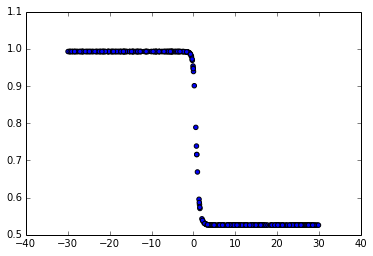

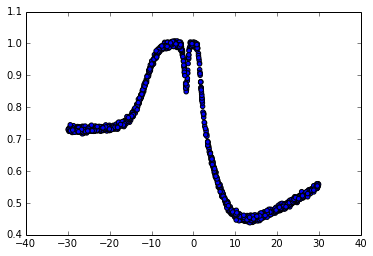

In [84]:
plt.figure(1)
plt.scatter(te_da,pred)
plt.figure(2)
plt.scatter(tr_da,tr_lab)
plt.show()